#3.1 분류 알고리즘 선택

분류 모델의 예측 성능과 계산 성능은 학습에 사용하려는 데이터에 크게 의존한다.

그에 따른 5가지 주요 단계를 정리하면 다음과 같다,

1. 특성을 선택하고 훈련 샘플을 모은다.
2. 성능 지표를 선택한다.
3. 분류 모델과 최적화 알고리즘을 선택한다,
4. 모델의 성능을 평가한다.
5. 알고리즘을 튜닝한다.![대체 텍스트](https://)

#붓꽃 데이터를 이용해서 sklearn을 시작해보자

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3.2 sklearn으로 Perceptron 알고리즘 구현

#(1) 데이터 불러오기

In [29]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


- 클래스 레이블이 0,1,2 라는 것은 target 즉, 꽃의 종류가 3개
- 클래스 레이블을 정수로 인코딩하는 것은 계산서

0 : Iris-setosa

1 : Iris-versicolor

2 : Iris-virginica

In [30]:
from sklearn.model_selection import train_test_split

# train_test_split 함수가 분할하기 전에 데이터셋을 미리 섞는다.
# stratify 는 계층화로 훈련 세트와 테스트 세트의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만든다는 의미이다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#(2) 특성 스케일 조정

-  사이킷런의 preprocessing 모듈의 StandardScaler 클래스를 사용하여 표준화

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(len(X_train_std))
print(len(X_test_std))

105
45


#(3) 퍼셉트론 알고리즘 구현



In [32]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1


In [34]:
from sklearn.metrics import accuracy_score
print('정확도 : %.2f' % accuracy_score(y_test, y_pred))
print('정확도 : %.2f' % ppn.score(X_test_std, y_test))

정확도 : 0.98
정확도 : 0.98


In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 좌표 벡터에서 좌표 행렬(정방 행렬)을 반환합니다
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # 그래프 공간을 전부 행렬로 만들고, classifier을 통해서 예측 된 Z는 
    # 그래프 공간의 공간마다 클래스 레이블 값으로 채운다.
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print("Z : ", Z)
    # contoruf를 통해서 xx1, xx2의 크기에서 Z 값마다 각 위치에 따라 색깔이 매핑된다.
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [37]:
a, b = np.meshgrid([1,2,3], [1,2])
# a는 행 별로 반복되고
# b는 열 별로 반복된다.
# 이러한 형태를 mesh grid
print(a)
print(b)

[[1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]]


XX.shape: (1000, 1000)
YY.shape: (1000, 1000)
[[4.24264069 4.23839593 4.23415543 ... 4.23415543 4.23839593 4.24264069]
 [4.23839593 4.23414691 4.22990216 ... 4.22990216 4.23414691 4.23839593]
 [4.23415543 4.22990216 4.22565314 ... 4.22565314 4.22990216 4.23415543]
 ...
 [4.23415543 4.22990216 4.22565314 ... 4.22565314 4.22990216 4.23415543]
 [4.23839593 4.23414691 4.22990216 ... 4.22990216 4.23414691 4.23839593]
 [4.24264069 4.23839593 4.23415543 ... 4.23415543 4.23839593 4.24264069]]


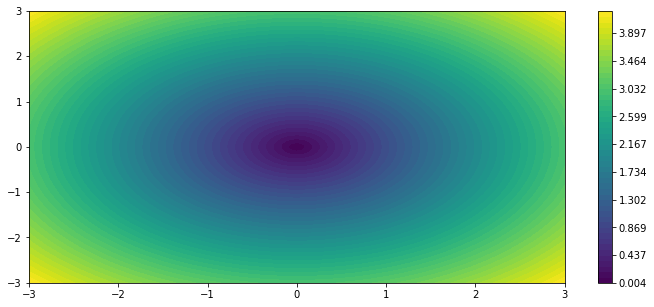

In [38]:
Xmesh, Ymesh = np.meshgrid(np.linspace(-3.0, 3.0, 1000),
                     np.linspace(-3.0, 3.0, 1000)
                    )
print("XX.shape: {}".format(Xmesh.shape))
print("YY.shape: {}".format(Ymesh.shape))
Z = np.sqrt(Xmesh**2 + Ymesh**2 )

print(Z)
plt.figure(figsize=(12, 5))
"""levels에 구간을 넣어줘서 등고선 표시 위치를 정할 수 있습니다. 
"""
cp = plt.contourf(Xmesh, Ymesh, Z, 
                  levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
                )
plt.colorbar(cp)
plt.show()

Z :  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


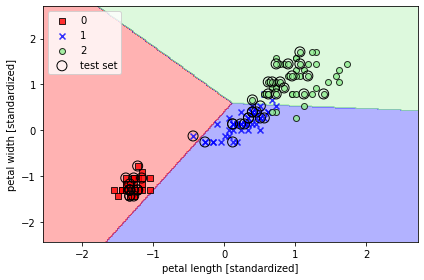

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [ 0.73088538,  0.92146681],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.56356787,  0.79036381],
       [ 1.73479045,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 1.0097479 ,  1.57698181],
       [ 0.50779537,  0.2659518 ],
       [ 1.0097479 ,  0.2659518 ],
       [ 1.12129291,

In [39]:
# vstack : 열을 기준으로 합친다. 즉, 샘플들을 전부 합친 데이터
X_combined_std = np.vstack((X_train_std, X_test_std))
# hstack : 행을 기준으로 합친다. 즉, 특성들을 전부 합친 데이터
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
X_combined_std

- 퍼셉트론 알고리즘으로는 선형적으로 구분되지 않는 데이터 셋에는 수렴하지 못한다.
- 근데 이번 친구는 왜 이렇게 잘했을까? 할튼 추천하지 않는다니까 하지말자

#3.3 로지스틱 회귀를 사용한 클래스 확률 모델링 

- 간단하지만 선형 이진 분류에 있어서 강력하다.
- 이름이 회귀이지만 분류모델이다.

#3.3.1 Sigmoid 함수 그리기

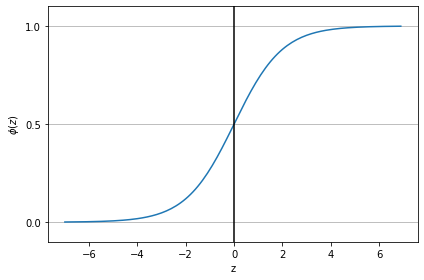

In [40]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0/ (1.0 + np.exp(-z))

z = np.arange(-7,7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#3.3.2 로지스틱 비용 함수의 가중치 학습

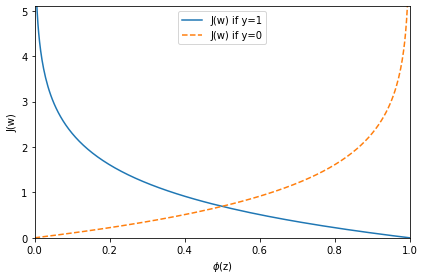

In [41]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [42]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Z :  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


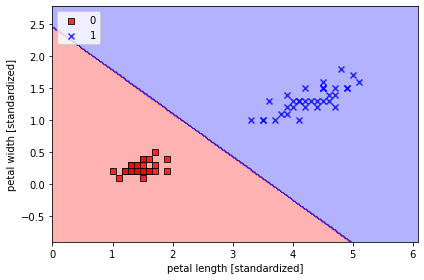

In [43]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

- 아래는 사이킷런을 사용해서 로지스틱 회귀 모델 훈련

Z :  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


Text(0, 0.5, 'petal width [standardized]')

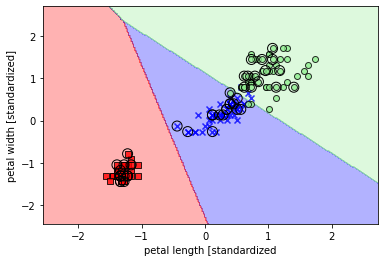

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto',
                        C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized]')

- 코드에서 매개변수 C는 과대적합과 규제 개념에 관련된 parameter이다.
- 아래 람다 의 역수 = C 가 된다.

#3.3.5 규제를 사용하여 과대적합 피하기

- 과대 적합 : 데이터에서 너무 복잡한 모델을 만들어서 분산이 크다.

- 과소 적합 : 편향이 크다. 훈련 데이터의 패턴을 감지하지 못할 정도로 패턴이 단순하다.

- 좋은 편향-분산 트레이드오프를 찾는 것이 중요하다. 

  규제를 사용해서 모델의 복잡도를 조정
  규제는 공선성(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡읍을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법이다. 또한 과도한 가중치 값을 제한하기 위해 추가적인 정보(편향)을 주입하는 개념.

  가장 널리 사용하는 L2 규제( L2 축소 또는 가중치 감쇠)

  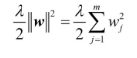

- 람다는 규제 hyper-parameter 이다.

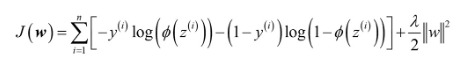

- 두 개의 가중치에 대해서 L2 규제 효과를 그래프로 나타낸다면,

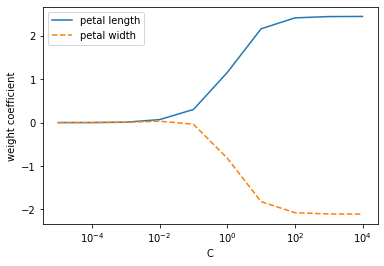

In [45]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

- C 값이 작을 때는 가중치의 절대값이 매우 작다. (즉, 규제 강도가 강하다는 의미)

#3.4 서포트 벡터 머신을 사용한 최대 마진 분류

- Support Vector machine ( SVM )
- SVM의 최적화 대상 : 마진을 최대화

Z :  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


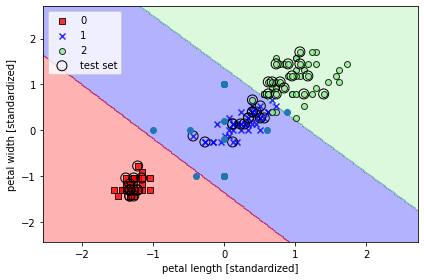

In [46]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- 로지스틱 회귀 : 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM보다 이상치에 민감하다. (업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합하다.)

- SVM : 결정 경계에 가장 가까운 포인트(support vector)에 관심을 둔다.



#3.5 커널 기법을 사용하여서 고차원 공간에서 분할 초평면 찾기

In [61]:
X_xor = np.random.randn(200, 2)     # 난수 값으로 200 * 2 행렬을 만든다.
y_xor = np.logical_xor(X_xor[:,0] > 0,      # X_xor 의 0번째 열의 각 행, 1번째 열의 각 행의 값이 다르면 true, 틀리면 false로 크기 200 * 1행렬을 만든다.
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)     # 200 * 1행렬에서 true는 1로 false는 -1로 만든다.

print(X_xor[y_xor == 1, 0])       # y_xor 이 true인 부분    Xor이 1인 부분
print(X_xor[y_xor == -1, 1])      # y_xor 이 false인 부분   Xor이 0인 부분

[ 0.58017764  0.32681306  0.67452822  1.07751998 -1.00011572 -0.09618769
 -0.3558323   0.58173929  0.32486855 -0.82490452 -0.39314216  1.16430865
 -1.63348696 -0.6688955   0.70009952  0.75276147  0.08828231 -0.45492784
 -1.00476461 -0.46518635 -0.5886461  -1.84599655  0.49513758 -0.13807466
  0.35311566 -0.20980438 -0.42394975  0.09441541 -1.83589904 -0.1678181
 -0.65034433 -0.68473971  0.3074892  -0.96375439 -1.18842461  0.05403696
 -0.53006095 -1.33740159  0.19431319  0.78506248  1.03075433 -1.64663478
 -1.25811592 -0.5878981  -0.29823865  0.64974469  0.6685634  -0.07710696
  0.5282585   0.69172086  1.47357393  0.9703637  -0.29952033 -0.57556888
 -1.25627821  0.2898594  -0.74447281  0.05972218  0.1887792   3.2383432
  0.11724318 -0.42368177 -0.47145316 -0.30243146  1.24845728  0.69943567
  0.3792161  -1.13691382  0.13965557 -1.14435574  1.0558686  -0.77717532
 -1.32151338 -0.67834807 -0.74681724  1.22022248  0.57802494  1.39301575
 -0.79274062 -2.73914174 -0.3060365  -0.09797565  0.1

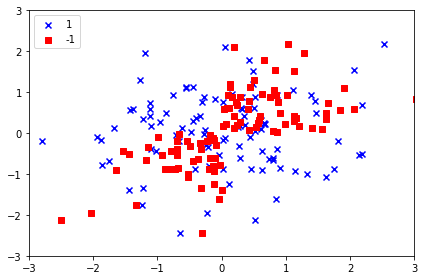

In [47]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == -1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Z :  [[-1 -1 -1 ...  1  1  1]
 [-1 -1 -1 ...  1  1  1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]


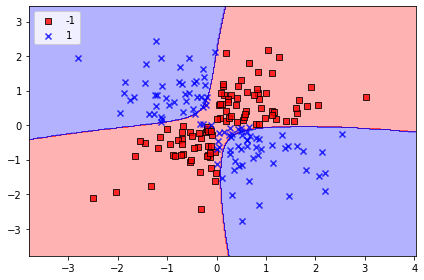

In [48]:
# kernel에 linear이 아닌 Radial Basis function (방사기저 함수, 가우시안 함수)를 사용해서 비선형 문제를 푼다.
# gamma는 가우시안 구의 크기를 제한하는 hyper-parameter로 생각하면 된다.
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- gamma 값을 크게 하면 서포트 벡터 영향이나 범위가 줄어든다. 
- 결정 경계는 더욱 샘플에 가까워지고 구불구불해진다.

Z :  [[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


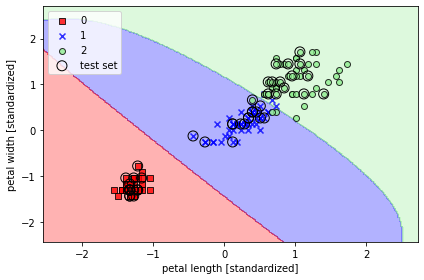

In [49]:
# gamma 값을 작게한 경우
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- gamma 값이 작으므로 RBF 커널 SVM 모델이 만든 결정 경계가 부드럽다.

Z :  [[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


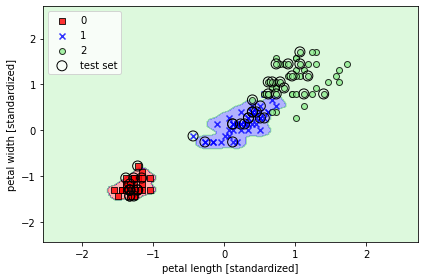

In [50]:
# gamma 값을 크게한 경우
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- 클래스 0, 클래스 1 주위로 결정 경계가 매우 가깝게 나타난다.
- 훈련 데이터에서는 잘 맞지만 본 적 없는 데이터에서는 일반화 오차가 매우 높다.
- gamma가 과대적합을 조절하는데 중요한 역할을 한다는 것을 알 수 있다. 

#3.6 결정 트리 학습

###3.6.1 정보 이득 최대화를 위한 (불순도 지표 or 분할 조건)

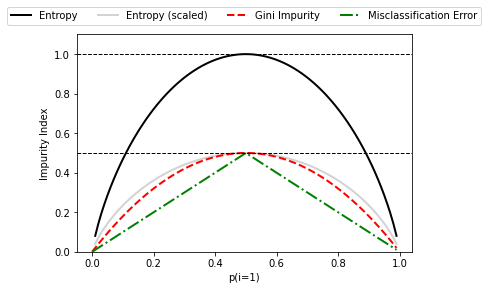

In [51]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

- Gini impurity와 Entropy / 2와 매유 유사한 것을 알 수 있다.

###3.6.2 결정 트리 만들기

Z :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


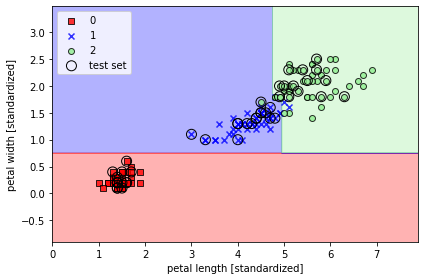

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, 
                      y_combined,
                      classifier=tree,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- GraphViz 프로그램을 이용해서 트리를 시각화할 수 있다.

###3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결

- 랜덤 포레스트는 결정트리의 앙상블이다.
- 여러 개의 결정 트리를 평균내는 것이 그 아이디어이다.
- 개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄인다.

- 앙상블 : 조화 또는 통일을 의미.

어떤 데이터의 값을 예측한다고 할 때, 하나의 모델을 활용합니다. 하지만 여러 개의 모델을 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용한다면 더 정확한 예측값을 구할 수 있을 겁니다.

####순서

1. n개의 랜덤한 부트스트랩 샘플을 뽑는다.
2. 부트스트랩 샘플에서 결정 트리를 학습한다. 각 노드에 대해서

    a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택한다.

    b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할한다,

3. 단계 1,2 를 k번 반복한다.
4. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블에 할당.

####장점

1. 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 된다.
2. 일반적으로 가지치기할 필요가 없다.
3. 실전에서는 랜덤 포레스트가 만들 트리 개수가 가장 중요
4. 트리 개수가 많을 수록 비용이 증가하지만 분류기 성능은 좋아진다.

Z :  [[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


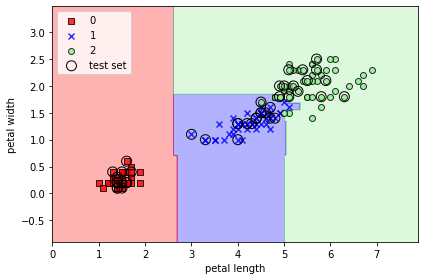

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- n_estimators 매개변수로 25개의 결정 트리를 사용하여 랜덤 포레스트를 훈련
- 불순도 지표 : gini impurity 사용
- n_jobs : 멀티 코어를 이용해서 모델 훈련을 병렬화 한다.

#3.7 k-최근접 이웃

- 순서

1. 숫자 k와 거리 측정 기준을 선택한다.
2. 분류하려는 샘플(입력)에서 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통패 클래스 레이블을 할당한다.


Z :  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


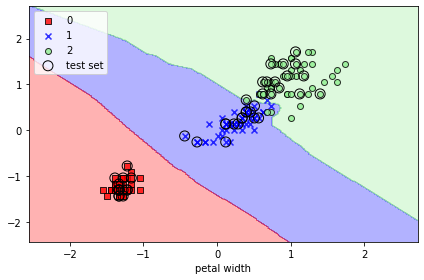

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.xlabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

1. p = 1인 경우, 맨해튼 거리
2. p = 2인 경우, 유클라디안 거리

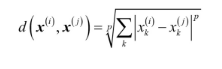